# HR Dataset-- Data Visualization:

- Plot a correlation map for all numeric variables
- Overtime
- Marital Status
- Job Role
- Gender
- Education Field
- Department
- Business Travel
- Relation between Overtime and Age
- Total Working Years
- Education Level
- Number of Companies Worked
- Distance from Home

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import warnings 
import os
import matplotlib.pyplot as plt

In [141]:
warnings.filterwarnings('ignore')
hr = pd.read_csv(r'/Users/aaliyahdavy/Documents/Data_Science_Portfolio/HR_Analytics/HR-Employee-Attrition.csv')
hr.head() 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [110]:
# All possible values (both numerical or categorical) for each column in the dataframe.

print(hr.apply(lambda col: col.unique())) 
    # (alternative code, same result): pd.Series({col:df[col].unique() for col in df})

Age                         [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                           [Yes, No]
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
Department                   [Sales, Research & Development, Human Resources]
DistanceFromHome            [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                     [2, 1, 4, 3, 5]
EducationField              [Life Sciences, Other, Medical, Marketing, Tec...
EmployeeCount                                                             [1]
EmployeeNumber              [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...
EnvironmentSatisfaction                                          [2, 3, 4, 1]
Gender                                                         [Female, Male]
HourlyRate                  [94, 61, 92, 56, 40, 79, 81, 67, 44,

# Categorical Data

In [108]:
hr_cat = hr.select_dtypes(include=['object'])
hr_cat.apply(lambda col: col.unique())

Attrition                                                 [Yes, No]
BusinessTravel       [Travel_Rarely, Travel_Frequently, Non-Travel]
Department         [Sales, Research & Development, Human Resources]
EducationField    [Life Sciences, Other, Medical, Marketing, Tec...
Gender                                               [Female, Male]
JobRole           [Sales Executive, Research Scientist, Laborato...
MaritalStatus                           [Single, Married, Divorced]
Over18                                                          [Y]
OverTime                                                  [Yes, No]
dtype: object

# Numerical Data

In [109]:
hr_num = hr.select_dtypes(exclude=['object'])
hr_num.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Correlation Map for Numerical Values:

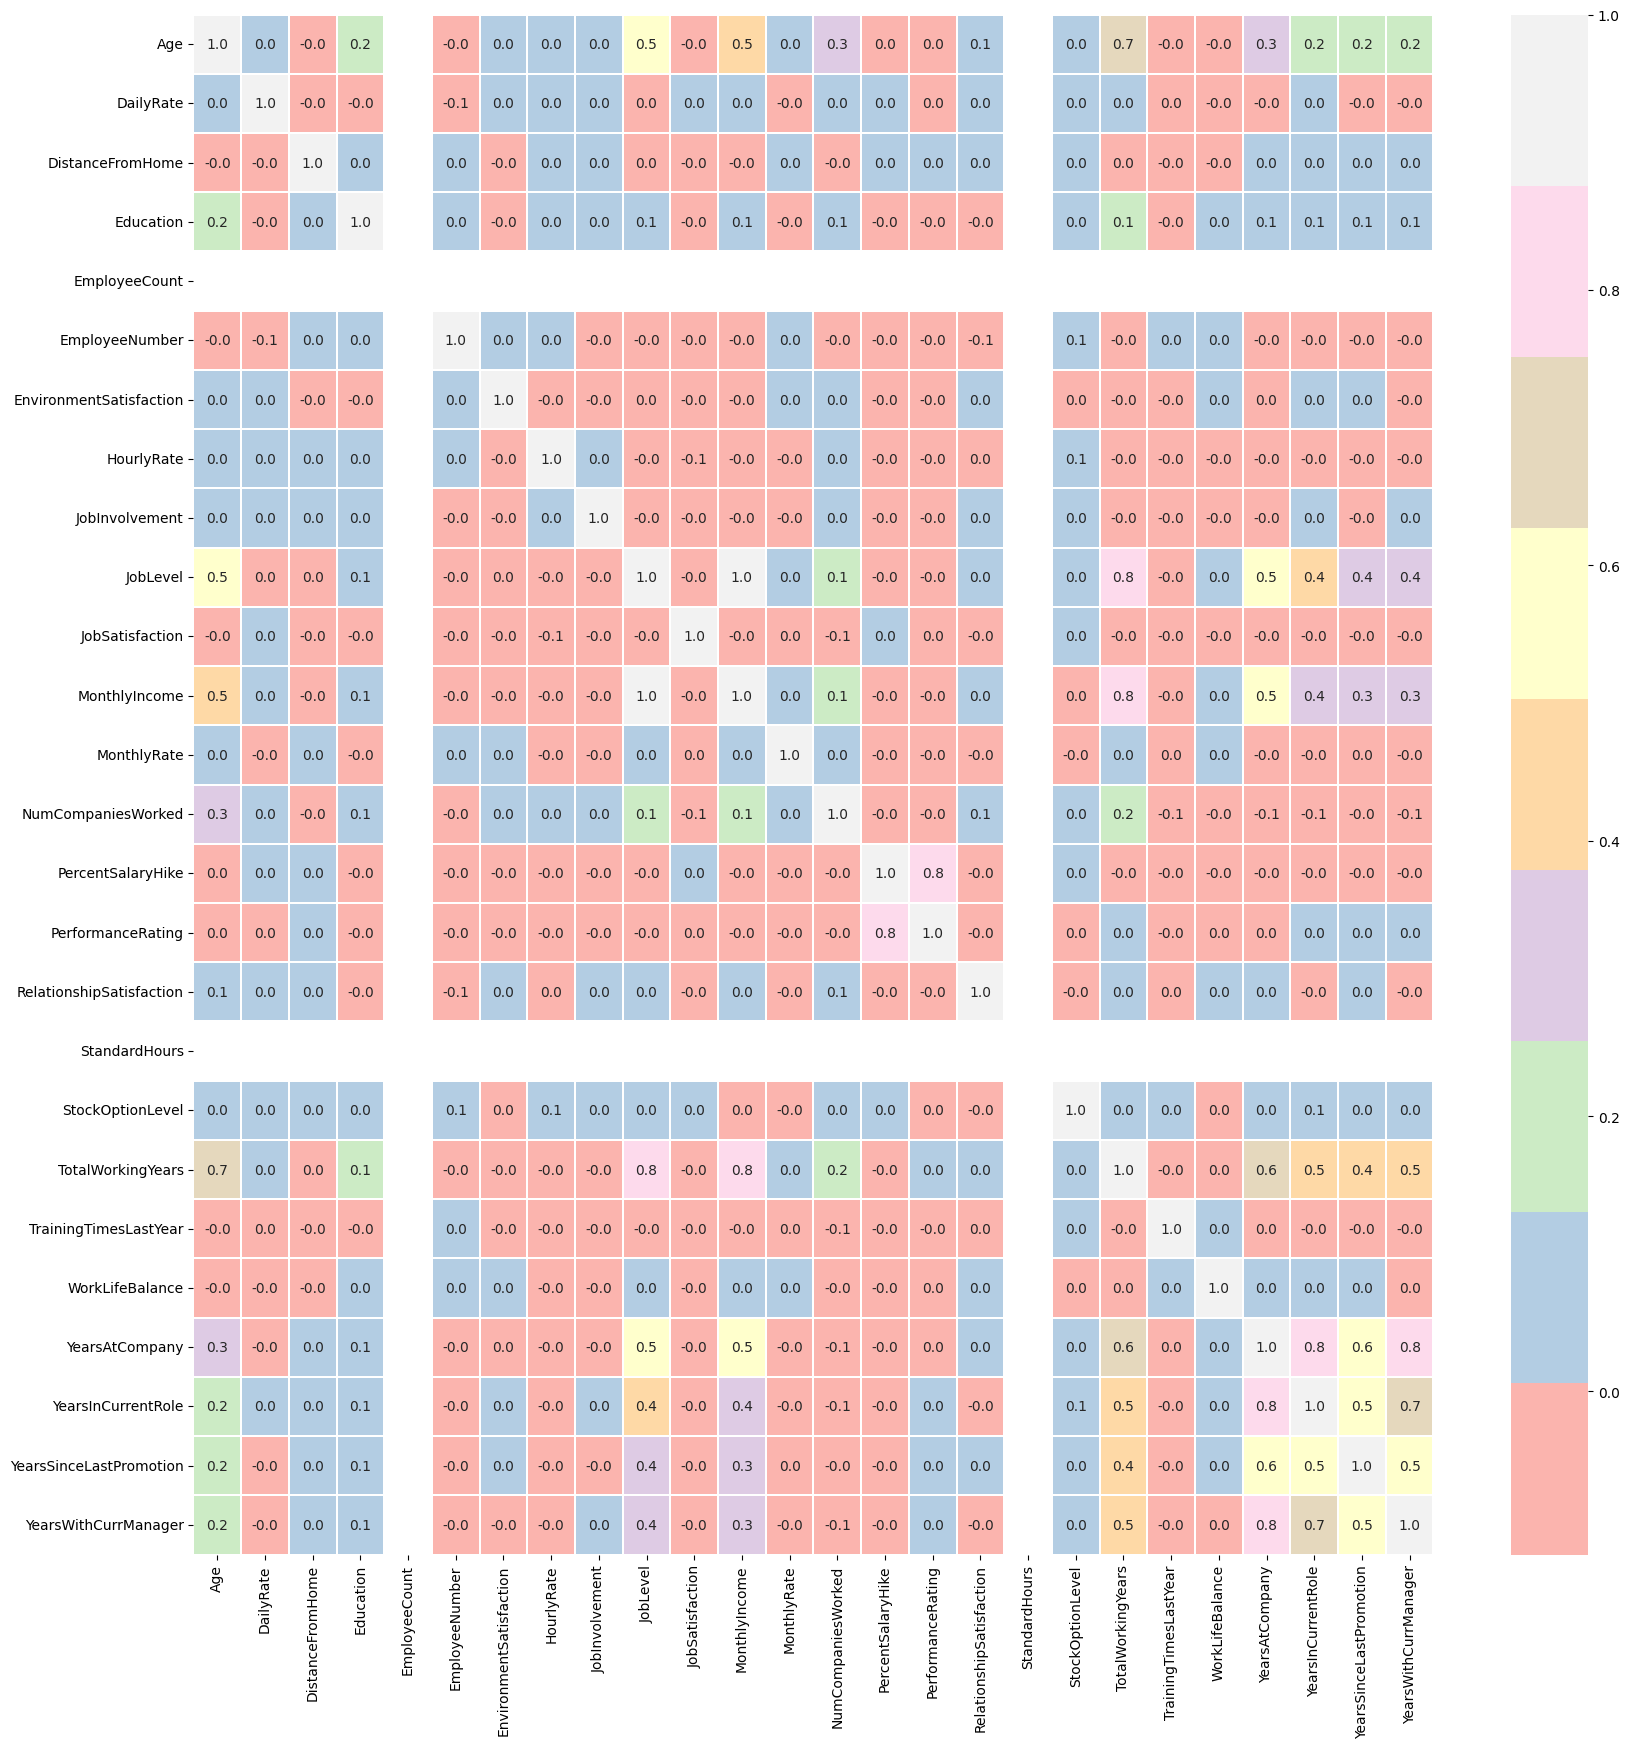

In [204]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(hr_num.corr(), cmap = 'Pastel1', annot=True, linewidths=.1, fmt= '.1f',ax=ax)
plt.show()

# Overtime (by Attrition)

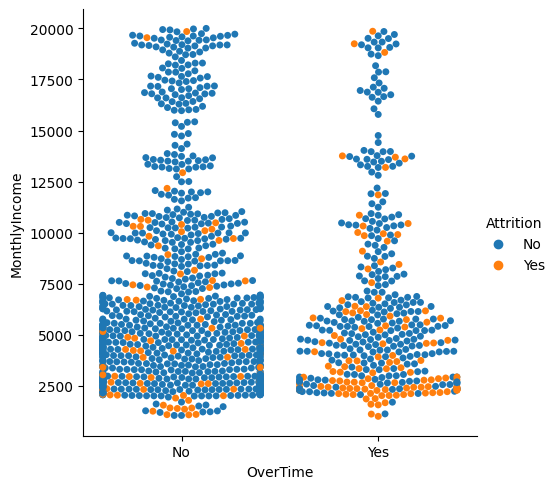

In [5]:
sns.catplot(data=hr.sort_values('OverTime'),
    x='OverTime', y='MonthlyIncome', hue='Attrition', kind='swarm')

# Monthly Income (by Marital Status)

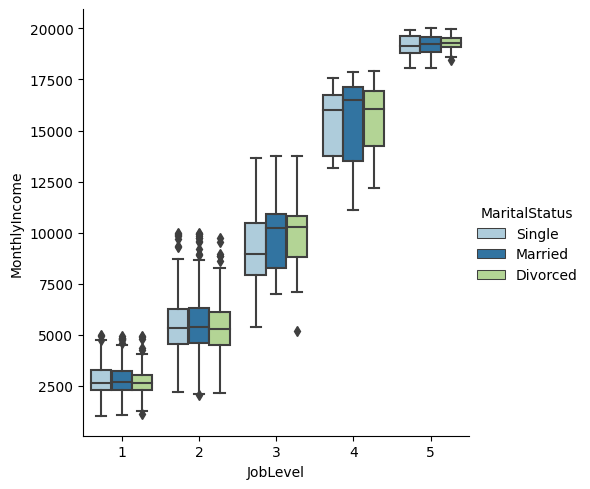

In [6]:
sns.catplot(data=hr,x='JobLevel',y='MonthlyIncome',hue='MaritalStatus',kind='box',palette='Paired')

# Years In Current Role vs Monthly Income

<Axes: xlabel='YearsInCurrentRole', ylabel='MonthlyIncome'>

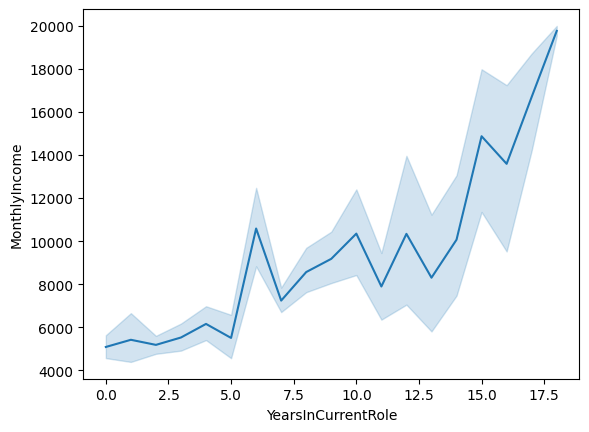

In [124]:
sns.lineplot(data=hr, x='YearsInCurrentRole', y='MonthlyIncome')

# Job Satisfaction (by Attrition)

<Axes: xlabel='JobSatisfaction', ylabel='count'>

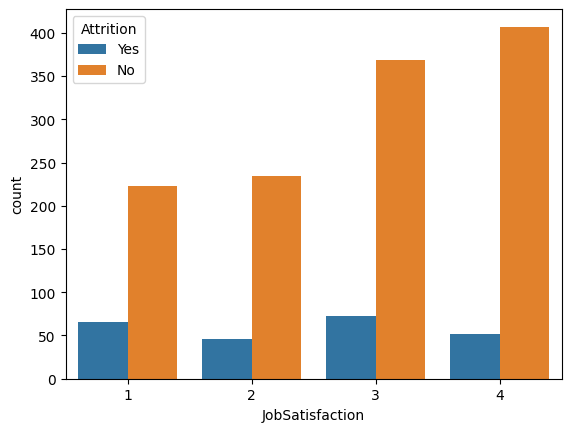

In [202]:
sns.countplot(hr, x='JobSatisfaction', hue='Attrition')

# Performance Rating vs Salary Hikes (by Gender)

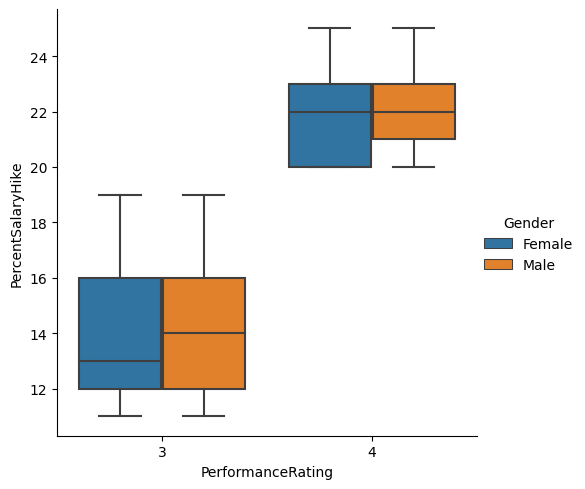

In [9]:
sns.catplot(data=hr, x='PerformanceRating', y='PercentSalaryHike', hue='Gender', kind='box')

# Education Level vs Job Role (by Gender)

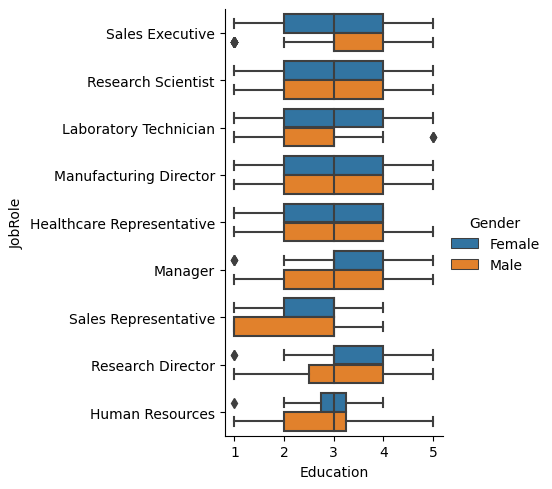

In [10]:
sns.catplot(data=hr, x='Education', y='JobRole', hue='Gender', kind='box')

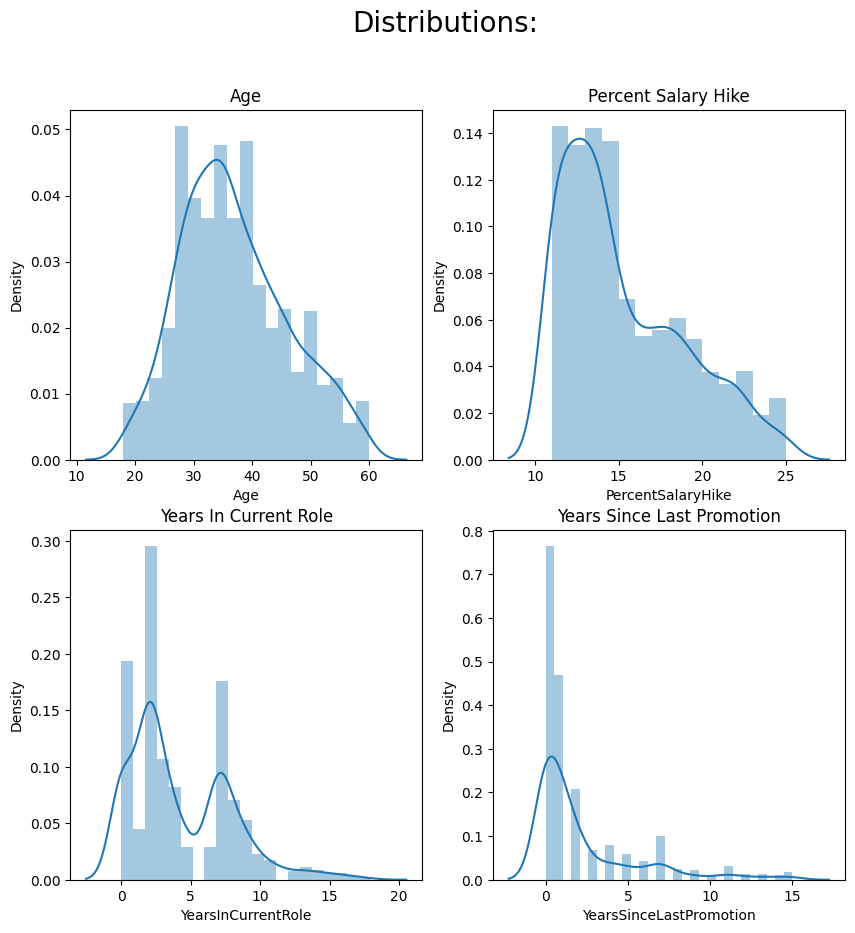

In [11]:
fig,ax = plt.subplots(2,2, figsize=(10,10))             
plt.suptitle('Distributions:', fontsize=20)
sns.distplot(hr['Age'], ax = ax[0,0])  
ax[0][0].set_title('Age')
sns.distplot(hr['PercentSalaryHike'], ax = ax[0,1]) 
ax[0][1].set_title('Percent Salary Hike')
sns.distplot(hr['YearsInCurrentRole'], ax = ax[1,0]) 
ax[1][0].set_title('Years In Current Role')
sns.distplot(hr['YearsSinceLastPromotion'], ax = ax[1,1]) 
ax[1][1].set_title('Years Since Last Promotion')
plt.show()                                                

# Attrition vs Years Since Last Promotion (by Gender)

<Axes: xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

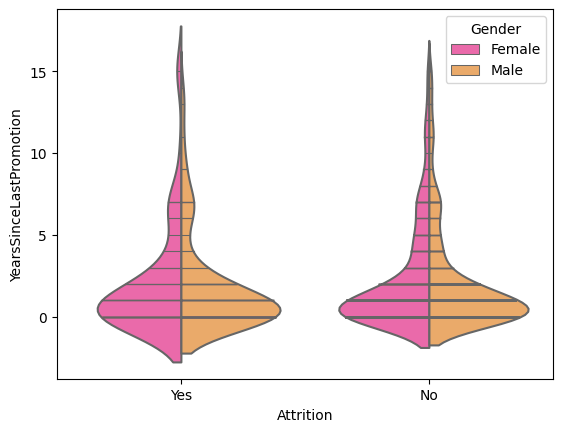

In [203]:
sns.violinplot(x='Attrition', y='YearsSinceLastPromotion', hue='Gender', data=hr, palette='spring', split=True,
               inner='stick')

# Job Satisfaction vs Monthly Income (by Job Level)

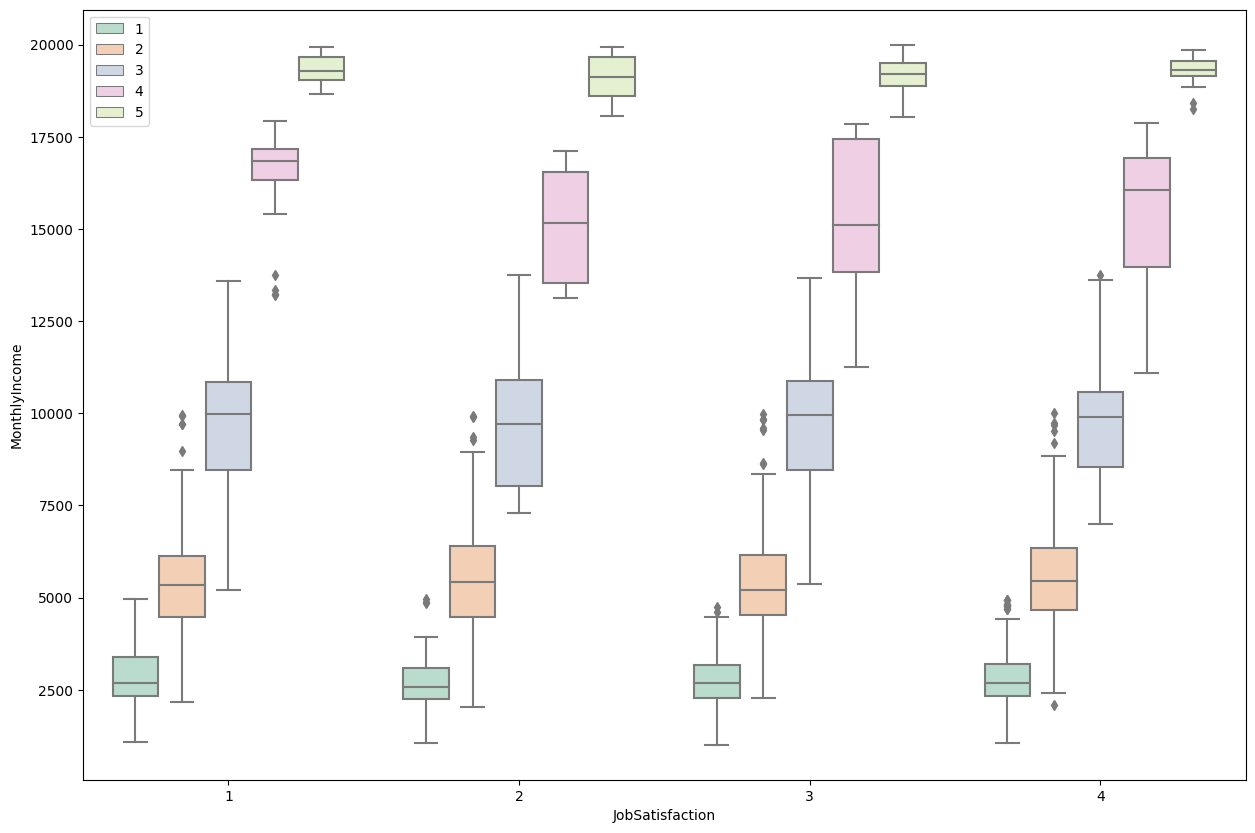

In [13]:
f,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', data=hr, hue='JobLevel',palette='Pastel2')
plt.legend(loc='best')
plt.show()

# Total Working Years vs Education Field (by Business Travel)

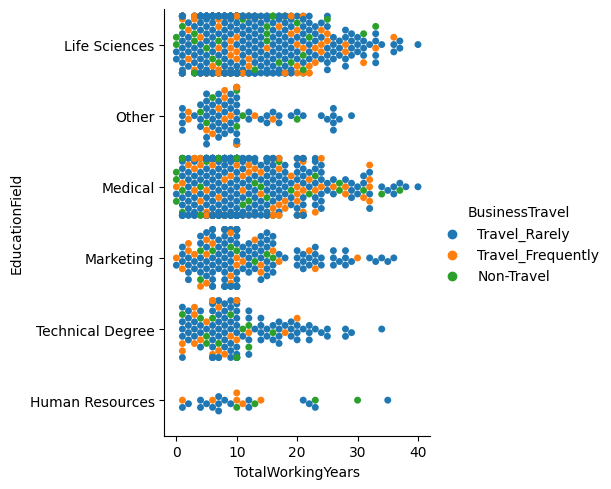

In [199]:
sns.catplot(data=hr, x='TotalWorkingYears', y='EducationField', hue='BusinessTravel', kind='swarm')

# Overtime vs Age

<Axes: xlabel='OverTime', ylabel='Age'>

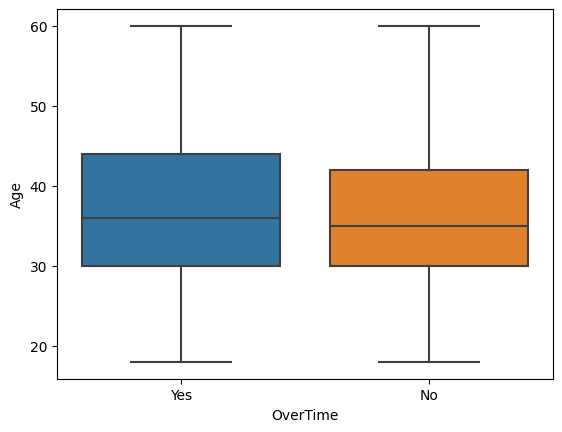

In [192]:
sns.boxplot(hr, x='OverTime', y='Age')

# Number Companies Worked vs Distance From Home (by Business Travel)

<Axes: xlabel='NumCompaniesWorked', ylabel='DistanceFromHome'>

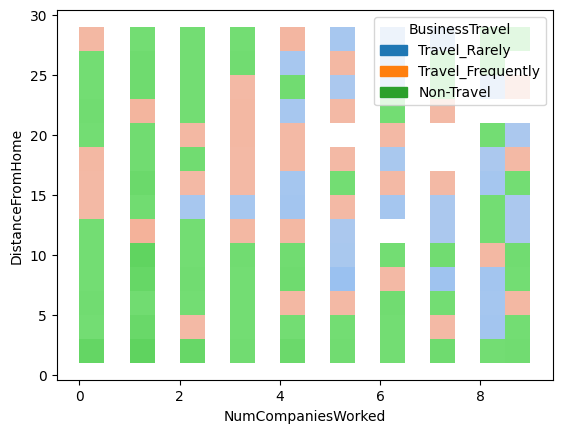

In [138]:
sns.histplot(data=hr, x='NumCompaniesWorked', y='DistanceFromHome', hue='BusinessTravel')

# Age Analysis (by Attrition)

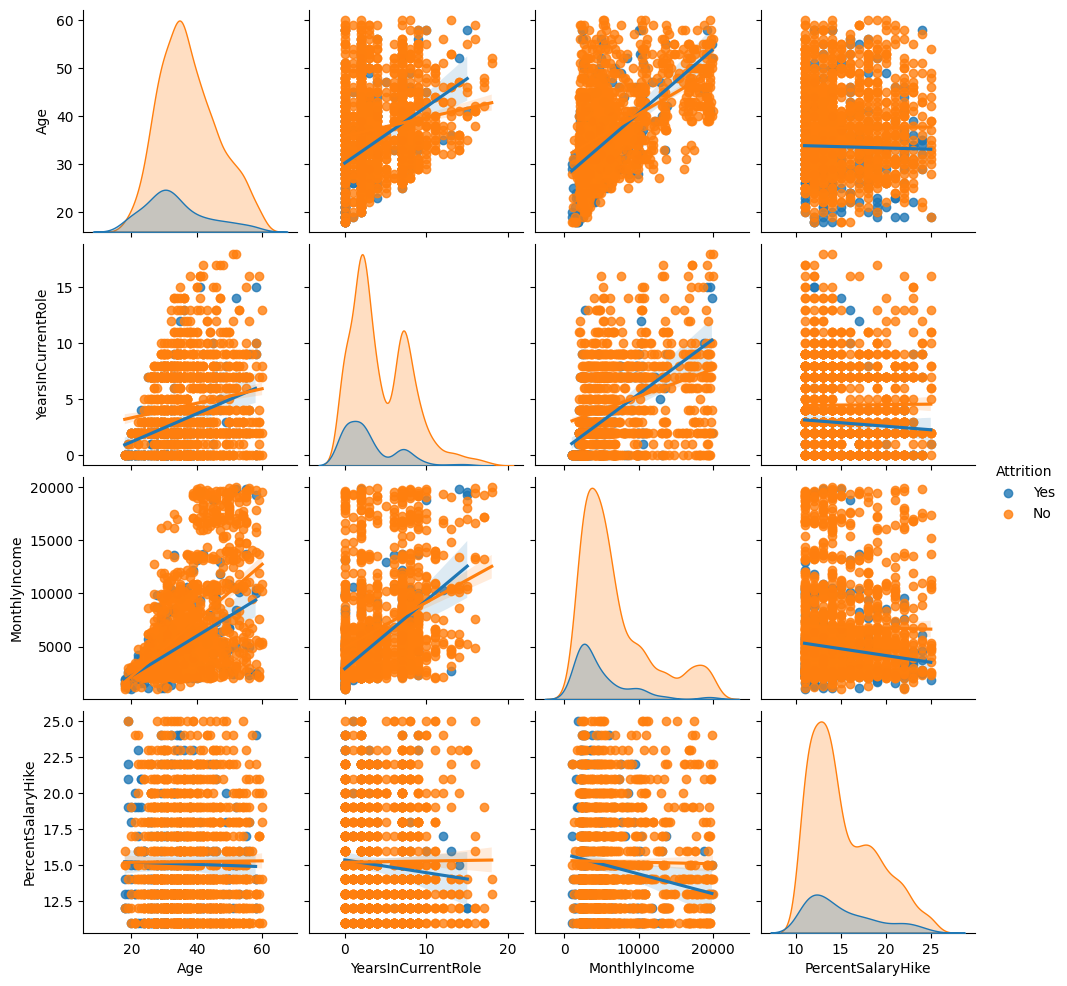

In [19]:
data1 = ['Age','Attrition','YearsInCurrentRole','MonthlyIncome','PercentSalaryHike']
sns.pairplot(hr[data1], kind='reg', diag_kind = 'kde' , hue = 'Attrition' )
plt.show()